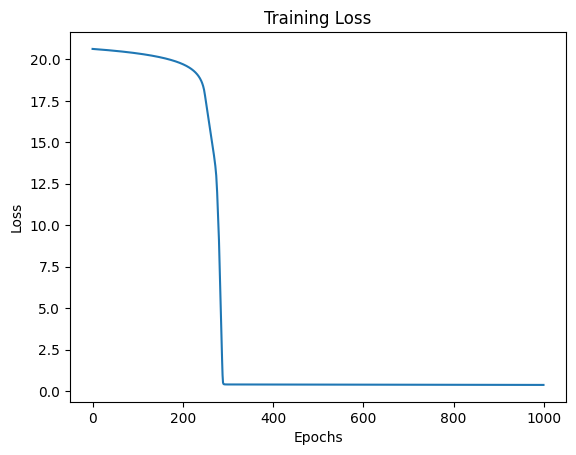

Learned weight (w): 0.0427597239613533
Learned bias (b): -0.7386888265609741
Predicted probability for input 30: 0.6328


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100]).view(-1, 1).float()  # Features
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]).view(-1, 1).float()  # Target labels

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # sigmoid activation


model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_list = []

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

with torch.no_grad():
    y_pred_final = model(X)


print("Learned weight (w):", model.linear.weight.item())
print("Learned bias (b):", model.linear.bias.item())

test_input = torch.tensor([[30.0]]).float()
predicted_prob = model(test_input).item()
print(f"Predicted probability for input 30: {predicted_prob:.4f}")